In [ ]:
from google.colab import drive
drive.mount('/content/drive')





Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg



!ls "/content/drive/My Drive/before"
data = pd.read_csv("/content/drive/My Drive/before/kruskalTest_2013.csv")

data.head()



In [ ]:
data.boxplot('Method1', by='Class')
data.boxplot('Mean HR', by='Class')
data.boxplot('RMSSD', by='Class')
data.boxplot('Stress index', by='Class')
data.boxplot('LF power', by='Class')
data.boxplot('HF power', by='Class')
data.boxplot('LF power.2', by='Class')
data.boxplot('HF power.2', by='Class')
data.boxplot('SampEn', by='Class')
data.boxplot('ApEn', by='Class')


In [ ]:
grps = pd.unique(data.Class.values)
d_data={grp:data['Mean HR'][data.Class == grp] for grp in grps}
k = len(pd.unique(data.Class))
N = len(data.values)
n = data.groupby('Class').size()[0]

In [ ]:
from scipy import stats

f, p = stats.f_oneway(d_data['0'], d_data['1'], d_data['2'], d_data['4'])

In [ ]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!ls "/content/drive/My Drive/Protocol"
data = pd.read_csv("/content/drive/My Drive/Protocol/03_final.csv")

data.head()




 02.gsheet
 02_reduced_hrv_1min.txt
 02_results.pdf
 03_final.csv
 03.gsheet
 03_results.pdf
 03_xlsx.gsheet
 08-46-33_reduced_himani_2_hrv_1min.txt
 23-15-28_reduced_himani_1_hrv_1min.txt
 AddAccelerometer.ipynb
 DataFiles
 himani_results_1.pdf
 himani_results_2.pdf
 NameCoding.txt
'With acceleromter'


,Activity,Class,Seconds,Temp,Time,Artifacts,PNS index,SNS index,Stress index,EE activity,EE activity.1,Intensity,Load,Mean RR,STD RR,Mean HR,STD HR,Min HR,Max HR,RMSSD,NNxx,pNNxx,HRVti,TINN,VLF peak,LF peak,HF peak,VLF power,LF power,HF power,VLF power.1,LF power.1,HF power.1,VLF power.2,LF power.2,HF power.2,LF power.3,HF power.3,LF/HF ratio,EDR,SD1,SD2,SD2/SD1,ApEn,SampEn,DFA a1,DFA a2,TP
0,Supine,4,0,22:11:46,22:11:46,1.2048,-0.9806,1.1895,9.44,1.85,1.85,0.0385,0.0385,714.67,49.2118,83.96,5.9440,75.7710,91.7515,41.07,12,14.6341,10.3750,222,0.023333,0.056667,0.24,69.88,1297.78,701.34,4.25,7.17,6.55,3.38,62.73,33.90,64.92,35.08,1.85,0.31,29.2185,63.5796,2.1760,0.49,1.05,1.0957,0.4242,2068.99
1,Supine,4,60,22:11:46,22:12:46,0.0000,-1.2553,1.7776,10.92,2.17,4.02,0.0805,0.1190,677.11,57.1832,88.61,7.5410,79.1077,101.4267,39.28,18,20.4545,12.7143,238,0.036667,0.113333,0.16,283.12,1698.24,382.61,5.65,7.44,5.95,11.98,71.84,16.19,81.61,18.39,4.44,0.35,27.9578,75.5367,2.7018,0.71,1.77,1.3730,0.3940,2363.97
2,Supine,4,120,22:11:46,22:13:46,0.0000,-0.4249,0.6364,8.84,1.74,5.76,0.0391,0.1582,779.76,58.0786,76.95,5.8245,68.2128,91.6926,50.32,15,19.7368,11.0000,229,0.040000,0.120000,0.15,109.33,1941.73,1998.99,4.69,7.57,7.60,2.70,47.94,49.36,49.27,50.73,0.97,0.31,35.8190,74.4730,2.0791,0.69,2.04,1.1397,0.2816,4050.04
3,Supine,4,180,22:11:46,22:14:46,0.0000,-0.6857,0.7654,10.93,0.54,6.29,0.0000,0.1582,816.69,44.4249,73.47,4.1452,64.2440,88.7180,35.39,12,16.6667,9.1250,202,0.023333,0.106667,0.16,252.98,594.61,766.96,5.53,6.39,6.64,15.67,36.83,47.50,43.67,56.33,0.78,0.36,25.2016,57.8988,2.2974,0.53,2.09,1.2552,0.6511,1614.54
4,Supine,4,240,22:11:46,22:15:46,2.8986,-0.6629,0.4674,10.30,0.33,6.62,0.0000,0.1582,869.25,51.1449,69.03,4.7975,63.2311,87.0487,30.46,6,8.8235,5.3077,204,0.033333,0.073333,0.16,542.90,2113.72,440.74,6.30,7.66,6.09,17.53,68.24,14.23,82.75,17.25,4.80,0.37,21.6969,69.4122,3.1992,0.63,1.18,1.8003,0.5091,3097.35


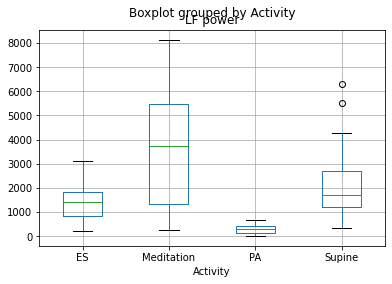

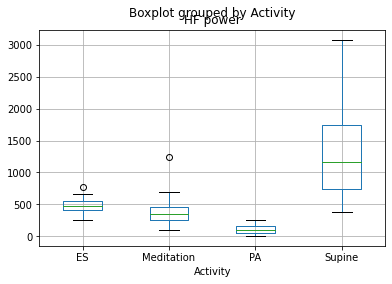

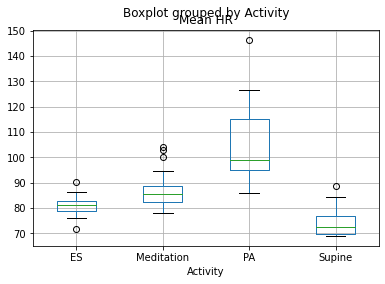

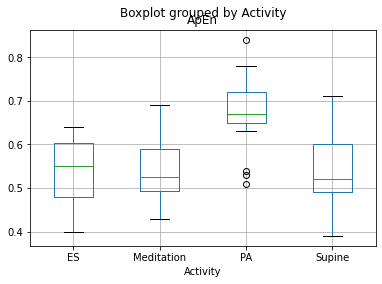

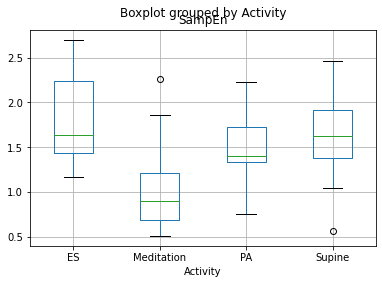

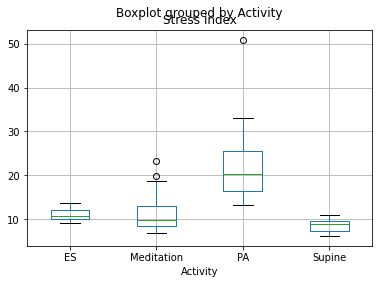

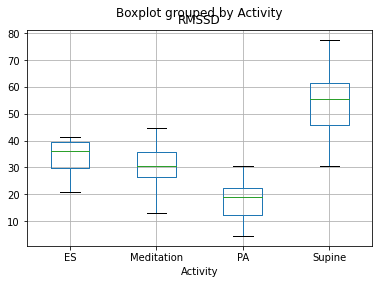

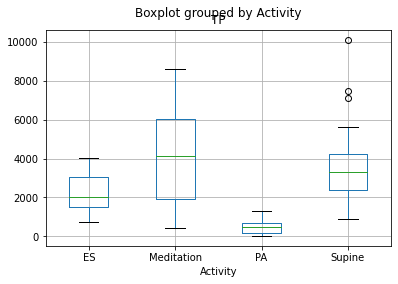

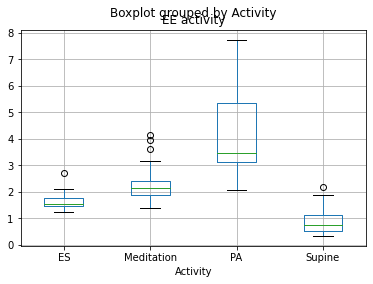

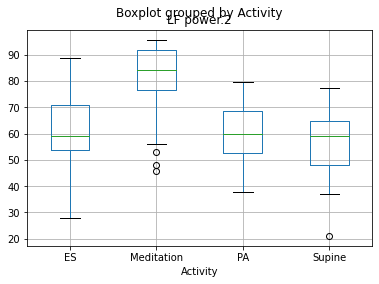

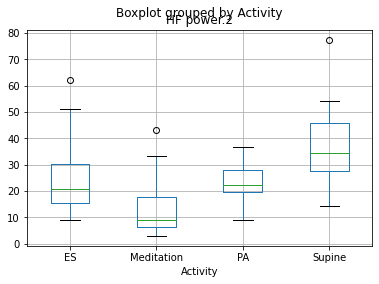

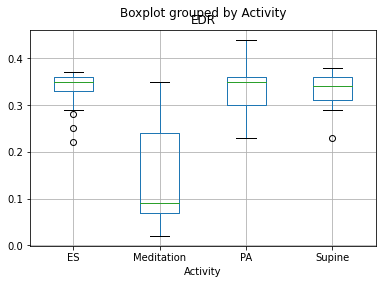

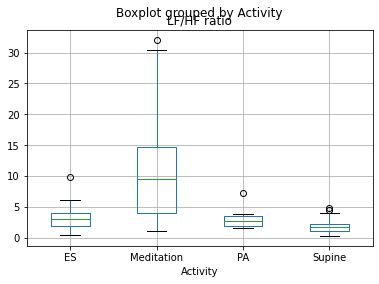

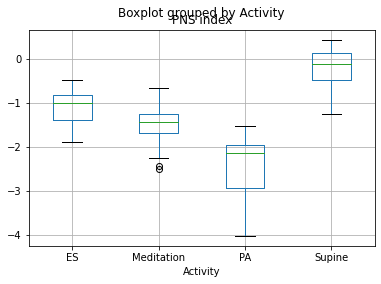

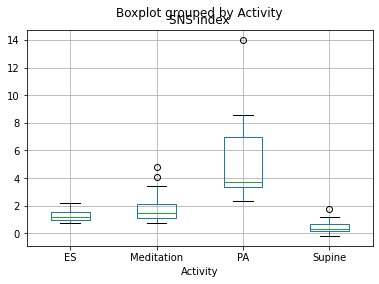

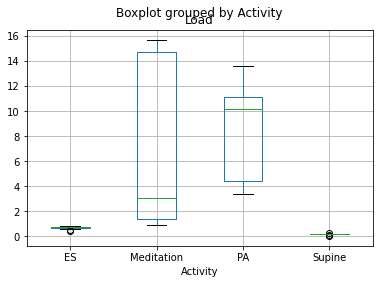

In [ ]:
parameters = ["LF power", "HF power", "Mean HR", "ApEn", "SampEn", "Stress index", "RMSSD", "TP", "EE activity", "LF power.2", "HF power.2", "EDR", "LF/HF ratio", "PNS index", "SNS index","Load"]
for x in parameters:
    data.boxplot(x, by='Activity')

In [ ]:
from prettytable import PrettyTable

parameters = ["LF power", "HF power", "Mean HR", "ApEn", "SampEn", "Stress index", "RMSSD", "TP", "EE activity", "LF power.2", "HF power.2", "EDR", "LF/HF ratio"]
list1_F = []
list2_p = []
for x in parameters :
    grps = pd.unique(data.Activity.values)
    d_data={grp:data[x][data.Activity == grp] for grp in grps}
    k = len(pd.unique(data.Activity))
    N = len(data.values)
    n = data.groupby('Activity').size()[0]
    from scipy import stats
    f, p = stats.f_oneway(d_data['PA'], d_data['Humming'], d_data['ES'], d_data['Supine'])
    list1_F.append(f)
    list2_p.append(p)

table = PrettyTable(['parameters','list1_F','list2_p'])
for x in range(0,len(parameters)):
  table.add_row([parameters[x],list1_F[x],list2_p[x]])
 
print("***Emotional Stress vs Physical Stress vs Humming vs Supine***")
table.sortby = ("list2_p")
print(table)

***Emotional Stress vs Physical Stress vs Humming vs Supine***
+--------------+--------------------+------------------------+
|  parameters  |      list1_F       |        list2_p         |
+--------------+--------------------+------------------------+
|    RMSSD     | 62.38699877373945  | 1.2087466029545633e-22 |
| EE activity  | 50.60256557608798  | 7.636043265232199e-20  |
|   Mean HR    | 45.01533255163273  | 2.243518684540829e-18  |
|   HF power   | 40.15487261793516  | 5.193837223932653e-17  |
| Stress index | 36.579450158334694 | 5.996033061105045e-16  |
|  LF power.2  | 23.419104087346838 | 1.6387201844894295e-11 |
|    SampEn    | 22.75325949797365  | 2.918474066435949e-11  |
|  HF power.2  | 21.77563991868739  | 6.894369078240408e-11  |
| LF/HF ratio  | 18.755114144822812 | 1.0817987283217515e-09 |
|   LF power   | 17.170090190682558 | 4.883199440615735e-09  |
|      TP      | 16.885915178768705 | 6.4290191733453475e-09 |
|     ApEn     | 15.066469339819047 | 3.877383178017432

In [ ]:
from prettytable import PrettyTable

parameters = ["LF power", "HF power", "Mean HR", "ApEn", "SampEn", "Stress index", "RMSSD", "TP", "EE activity", "LF power.2", "HF power.2", "EDR", "LF/HF ratio"]
list1_F = []
list2_p = []
for x in parameters :
    grps = pd.unique(data.Activity.values)
    d_data={grp:data[x][data.Activity == grp] for grp in grps}
    k = len(pd.unique(data.Activity))
    N = len(data.values)
    n = data.groupby('Activity').size()[0]
    from scipy import stats
    f, p = stats.f_oneway(d_data['PA'], d_data['Humming'])
    list1_F.append(f)
    list2_p.append(p)

table = PrettyTable(['parameters','list1_F','list2_p'])
for x in range(0,len(parameters)):
  table.add_row([parameters[x],list1_F[x],list2_p[x]])
 
print("***Physical Stress vs No stress***")
table.sortby = ("list2_p")
print(table)

***Physical Stress vs No stress***
+--------------+--------------------+------------------------+
|  parameters  |      list1_F       |        list2_p         |
+--------------+--------------------+------------------------+
| Stress index | 56.385608856613025 | 3.082152168333118e-10  |
| EE activity  | 49.34790392151198  |  2.10061850571518e-09  |
|   Mean HR    | 44.95095000827917  | 7.440946041758203e-09  |
|     ApEn     | 44.02997330494829  | 9.765480328559892e-09  |
|      TP      | 39.953464690993016 | 3.3548328590555734e-08 |
|    RMSSD     |  37.252149578849   | 7.826423105102042e-08  |
|   LF power   | 34.26139466922333  | 2.0587987806273165e-07 |
|  LF power.2  |  33.1483550576182  | 2.975412465692063e-07  |
|   HF power   | 26.45774731454718  | 3.0209573970428864e-06 |
|    SampEn    | 23.35038826018117  | 9.480066697895878e-06  |
|  HF power.2  | 17.02106554309423  | 0.00011382169183223524 |
|     EDR      |        nan         |          nan           |
| LF/HF ratio  | 16.

In [ ]:
from prettytable import PrettyTable

parameters = ["LF power", "HF power", "Mean HR", "ApEn", "SampEn", "Stress index", "RMSSD", "TP", "EE activity", "LF power.2", "HF power.2", "EDR", "LF/HF ratio"]
list1_F = []
list2_p = []
for x in parameters :
    grps = pd.unique(data.Activity.values)
    d_data={grp:data[x][data.Activity == grp] for grp in grps}
    k = len(pd.unique(data.Activity))
    N = len(data.values)
    n = data.groupby('Activity').size()[0]
    from scipy import stats
    f, p = stats.f_oneway(d_data['PA'], d_data['ES'])
    list1_F.append(f)
    list2_p.append(p)

table = PrettyTable(['parameters','list1_F','list2_p'])
for x in range(0,len(parameters)):
  table.add_row([parameters[x],list1_F[x],list2_p[x]])
 
print("***Emotional Stress vs Physical Stress***")
table.sortby = ("list2_p")
print(table)

***Emotional Stress vs Physical Stress***
+--------------+---------------------+------------------------+
|  parameters  |       list1_F       |        list2_p         |
+--------------+---------------------+------------------------+
|   HF power   |  87.36949205113112  | 4.811534021093951e-11  |
|    RMSSD     |  62.40028017973912  | 2.744824453025953e-09  |
|      TP      |  48.80104449012652  | 3.9854332453895344e-08 |
| EE activity  |  46.49377931411387  |  6.55743479780924e-08  |
|   Mean HR    |  41.446052131065976 | 2.0548926821504254e-07 |
|   LF power   |  31.232159559360667 | 2.6927606225802425e-06 |
| Stress index |  30.585518835191724 | 3.2131606765231005e-06 |
|     ApEn     |   23.866725790545   | 2.2671040465286402e-05 |
|    SampEn    |  4.104471622517876  |  0.050445888712755294  |
| LF/HF ratio  | 0.45122520667784366 |   0.5061636799217715   |
|  HF power.2  | 0.41129827100274574 |   0.525489051386627    |
|     EDR      |  0.1557114286238523 |   0.695530387926635    

In [ ]:
import math
from prettytable import PrettyTable

parameters = ["LF power", "HF power", "Mean HR", "ApEn", "SampEn", "Stress index", "RMSSD", "TP", "EE activity","LF power.2", "HF power.2", "EDR", "LF/HF ratio"]
list1_F = []
list2_p = []
for x in parameters :
    grps = pd.unique(data.Activity.values)
    d_data={grp:data[x][data.Activity == grp] for grp in grps}
    k = len(pd.unique(data.Activity))
    N = len(data.values)
    n = data.groupby('Activity').size()[0]
    from scipy import stats
    f, p = stats.f_oneway(d_data['ES'], d_data['Humming'])
    round(f,3)
    round(p,3)
    list1_F.append(f)
    list2_p.append(p)

table = PrettyTable(['parameters','list1_F','list2_p'])
for x in range(0,len(parameters)):
  table.add_row([parameters[x],list1_F[x],list2_p[x]])
 
print("***Emotional Stress vs No Stress***")
table.sortby = ("list2_p")
print(table)

***Emotional Stress vs No Stress***
+--------------+---------------------+------------------------+
|  parameters  |       list1_F       |        list2_p         |
+--------------+---------------------+------------------------+
|    SampEn    |  51.11152083272681  | 1.0174650344649793e-09 |
|  LF power.2  |  28.647036154912975 | 1.2517687105720782e-06 |
|  HF power.2  |  18.942513463543996 | 4.9514315031723656e-05 |
| LF/HF ratio  |  17.514692738652858 | 8.868146524496292e-05  |
| EE activity  |  16.266555582196528 | 0.00014910916731500557 |
|   LF power   |  15.993047307390283 | 0.00016731368072749373 |
|   Mean HR    |  14.883034406927278 | 0.00026839442910857596 |
|      TP      |  11.782948241244162 |  0.001052757413517621  |
|    RMSSD     |  4.862787764866884  |  0.03104171776053998   |
|   HF power   |  3.790129396560079  |  0.05594716764247159   |
| Stress index | 0.31142894484156125 |   0.5787516892670617   |
|     ApEn     | 0.13489481416075705 |   0.7146216657847213   |
|   

In [ ]:
from prettytable import PrettyTable
from scipy.stats import kruskal

parameters = ["LF power", "HF power", "Mean HR", "ApEn", "SampEn", "Stress index", "RMSSD", "TP", "EE activity", "LF power.2", "HF power.2", "EDR", "LF/HF ratio"]
list1_F = []
list2_p = []
for x in parameters :
    grps = pd.unique(data.Activity.values)
    d_data={grp:data[x][data.Activity == grp] for grp in grps}
    k = len(pd.unique(data.Activity))
    N = len(data.values)
    n = data.groupby('Activity').size()[0]
    from scipy import stats
    f, p = stats.f_oneway(d_data['Supine'], d_data['Humming'])
    list1_F.append(f)
    list2_p.append(p)

table = PrettyTable(['parameters','list1_F','list2_p'])
for x in range(0,len(parameters)):
  table.add_row([parameters[x],list1_F[x],list2_p[x]])
 
print("***Humming vs Supine***")
table.sortby = ("list2_p")
print(table)

***Humming vs Supine***
+--------------+----------------------+------------------------+
|  parameters  |       list1_F        |        list2_p         |
+--------------+----------------------+------------------------+
|    RMSSD     |  90.96944152796071   | 7.679653550835157e-14  |
| EE activity  |  64.00447062214734   | 3.563916376257273e-11  |
|  HF power.2  |   61.1186609360727   | 7.431833373865752e-11  |
|   HF power   |  60.20838652213272   | 9.404996689847583e-11  |
|   Mean HR    |  57.147549395310484  |  2.10390765869776e-10  |
|  LF power.2  |  47.40970511707608   | 3.1632808653998693e-09 |
|    SampEn    |  35.04182142760072   | 1.4535479970522108e-07 |
| LF/HF ratio  |  24.003149901592266  | 7.046461648610033e-06  |
| Stress index |  6.485539881630048   |  0.013331401843903584  |
|   LF power   |  5.339393231126792   |  0.024134846334000114  |
|      TP      | 0.16778917814041658  |   0.6834736148531932   |
|     ApEn     | 0.006935567306052683 |   0.9338929141162222   |
|

In [ ]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!ls "/content/drive/My Drive/Protocol"
data = pd.read_csv("/content/drive/My Drive/Protocol/01_final.csv")

data.head()


 01_final.csv		   08-46-33_reduced_himani_2_hrv_1min.txt
 02.gsheet		   23-15-28_reduced_himani_1_hrv_1min.txt
 02_reduced_hrv_1min.txt   AddAccelerometer.ipynb
 02_results.pdf		   DataFiles
 03_final.csv		   himani_results_1.pdf
 03.gsheet		   himani_results_2.pdf
 03_results.pdf		   NameCoding.txt
 03_xlsx.gsheet		  'With acceleromter'


,Activity,Class,Seconds,Temp,Time,Artifacts,PNS index,SNS index,Stress index,EE activity,EE activity.1,Intensity,Load,Mean RR,STD RR,Mean HR,STD HR,Min HR,Max HR,RMSSD,NNxx,pNNxx,HRVti,TINN,VLF peak,LF peak,HF peak,VLF power,LF power,HF power,VLF power.1,LF power.1,HF power.1,VLF power.2,LF power.2,HF power.2,LF power.3,HF power.3,LF/HF ratio,EDR,SD1,SD2,SD2/SD1,ApEn,SampEn,DFA a1,DFA a2,TP
0,Supine,4,0,23:19:28,23:19:28,2.4691,-1.0535,1.7942,14.9144,1.1926,1.1926,0.2764,0.2764,743.0000,33.9149,80.7537,3.8038,78.7257,85.5993,31.9352,10,12.5000,5.7857,121,0.040000,0.056667,0.253333,6.6189,225.3864,467.6902,1.8899,5.4178,6.1478,0.9460,32.2121,66.8420,32.5197,67.4803,0.4819,0.2578,22.7241,42.0488,1.8504,0.5969,1.5483,0.9500,0.2230,699.6955
1,Supine,4,60,23:19:28,23:20:28,0.0000,-0.9136,1.4313,13.2961,1.5927,2.7853,0.3962,0.6727,756.1899,34.2118,79.3452,3.5586,75.9667,86.1599,34.1646,10,12.8205,5.2667,145,0.040000,0.083333,0.250000,85.7492,571.0643,565.6487,4.4514,6.3475,6.3380,7.0145,46.7143,46.2713,50.2382,49.7618,1.0096,0.2534,24.3157,41.8941,1.7229,0.4021,1.0594,0.9721,0.3674,1222.4622
2,Supine,4,120,23:19:28,23:21:28,0.0000,-1.3475,2.5429,19.2455,1.5172,4.3026,0.3738,1.0465,737.8642,27.5249,81.3158,2.9988,75.2653,87.4738,23.2608,5,6.2500,5.7857,101,0.040000,0.063333,0.190000,19.3911,438.2838,364.1366,2.9648,6.0829,5.8975,2.3596,53.3314,44.3090,54.6202,45.3798,1.2036,0.2144,16.5569,35.1733,2.1244,0.5179,1.5553,0.9234,0.3306,821.8115
3,Supine,4,180,23:19:28,23:22:28,0.0000,-1.1911,1.3871,12.0031,1.3607,5.6633,0.3279,1.3744,748.1235,39.5530,80.2007,4.2105,72.1483,91.6031,29.0079,5,6.2500,10.1250,158,0.033333,0.066667,0.216667,186.0892,892.4417,255.6769,5.2262,6.7940,5.5439,13.9475,66.8893,19.1632,77.7308,22.2692,3.4905,0.2159,20.6415,52.3339,2.5354,0.5257,2.0749,1.2420,0.4519,1334.2078
4,Supine,4,240,23:19:28,23:23:28,0.0000,-0.7350,1.6386,16.1676,1.2041,6.8674,0.2864,1.6608,787.6776,31.2544,76.1733,2.9760,73.7246,78.2452,34.1776,16,21.3333,5.8462,107,0.036667,0.103333,0.223333,0.8367,124.0301,979.6897,-0.1783,4.8205,6.8872,0.0757,11.2290,88.6953,11.2375,88.7625,0.1266,0.2145,24.3300,37.0516,1.5229,0.4952,1.3945,0.6328,0.0455,1104.5565


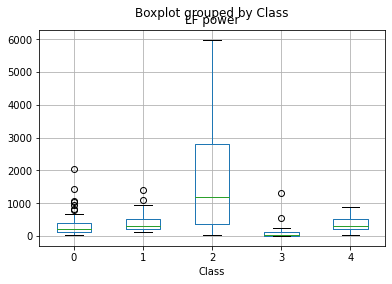

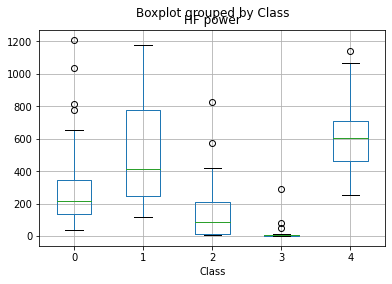

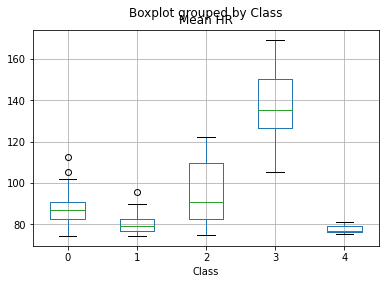

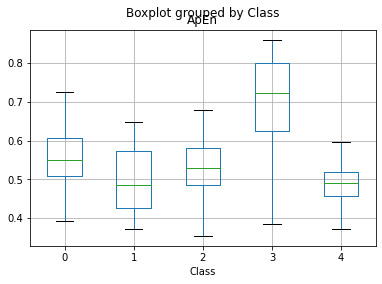

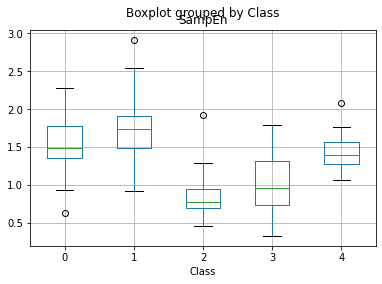

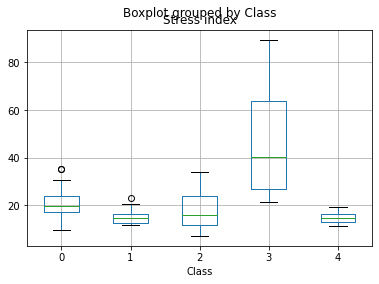

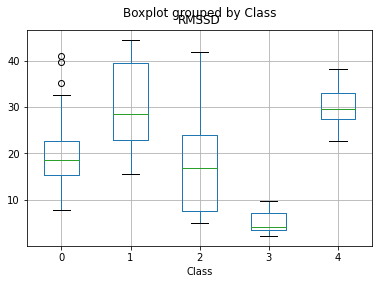

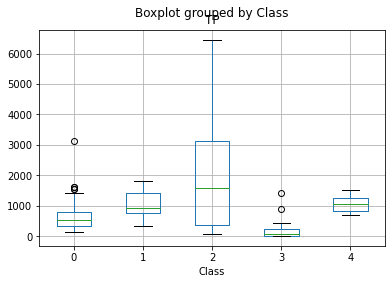

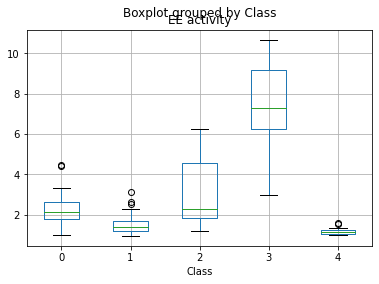

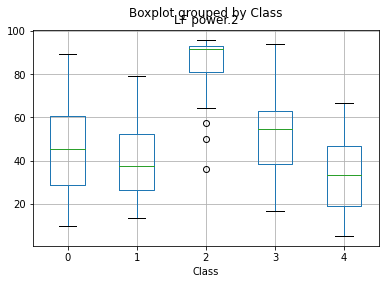

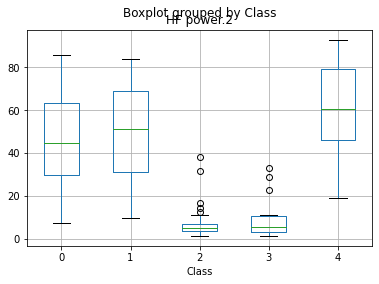

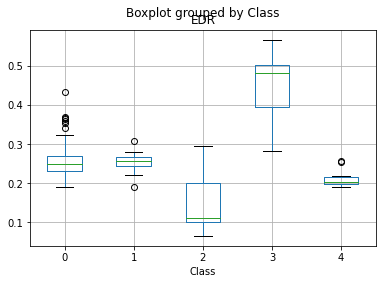

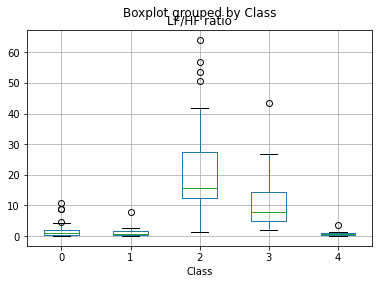

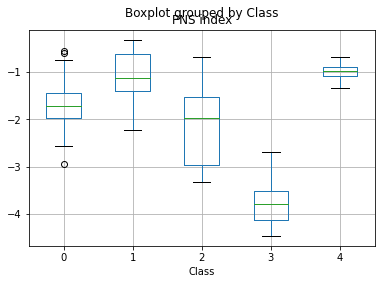

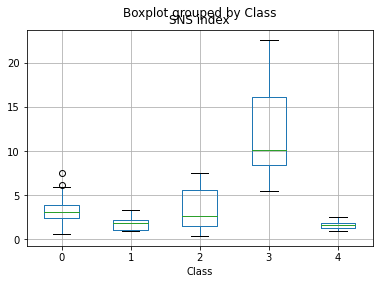

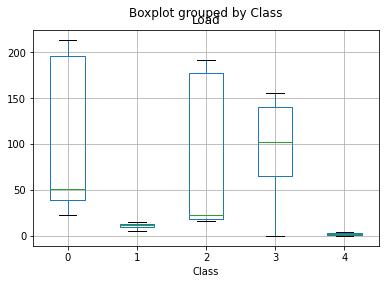

In [ ]:
parameters = ["LF power", "HF power", "Mean HR", "ApEn", "SampEn", "Stress index", "RMSSD", "TP", "EE activity", "LF power.2", "HF power.2", "EDR", "LF/HF ratio", "PNS index", "SNS index","Load"]
for x in parameters:
    data.boxplot(x, by='Class')